In [1]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Load datasets

In [2]:
ADNI_merge = pd.read_csv('ADNIMERGE.csv')
ADNI2 = ADNI_merge[ADNI_merge['COLPROT']=='ADNI2']
print("ADNI2 shape: ", ADNI2.shape)

ADNI2_impute = pd.read_csv('ADNI2_mb_impute_v3.csv')
print("ADNI2_impute shape: ", ADNI2_impute.shape)

ADNI2_remove = pd.read_csv('ADNI2_remove_all_missing_v3.csv')
print("ADNI2_remove shape: ", ADNI2_remove.shape)

ADNI2 shape:  (6937, 94)
ADNI2_impute shape:  (789, 58)
ADNI2_remove shape:  (789, 13)


In [3]:
print(ADNI2_impute.columns)

Index(['AGE', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'MMSE_bl',
       'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_forgetting_bl',
       'RAVLT_perc_forgetting_bl', 'FAQ_bl', 'Ventricles_bl', 'Hippocampus_bl',
       'WholeBrain_bl', 'Entorhinal_bl', 'Fusiform_bl', 'MidTemp_bl', 'ICV_bl',
       'MOCA_bl', 'EcogPtMem_bl', 'EcogPtLang_bl', 'EcogPtVisspat_bl',
       'EcogPtPlan_bl', 'EcogPtOrgan_bl', 'EcogPtDivatt_bl', 'EcogPtTotal_bl',
       'EcogSPMem_bl', 'EcogSPLang_bl', 'EcogSPVisspat_bl', 'EcogSPPlan_bl',
       'EcogSPOrgan_bl', 'EcogSPDivatt_bl', 'EcogSPTotal_bl', 'FDG_bl',
       'AV45_bl', 'Years_bl', 'PTEDUCAT', 'PTGENDER_Female', 'PTGENDER_Male',
       'PTETHCAT_Hisp/Latino', 'PTETHCAT_Not Hisp/Latino',
       'PTRACCAT_Am Indian/Alaskan', 'PTRACCAT_Asian', 'PTRACCAT_Black',
       'PTRACCAT_Hawaiian/Other PI', 'PTRACCAT_More than one',
       'PTRACCAT_White', 'PTMARRY_Divorced', 'PTMARRY_Married',
       'PTMARRY_Never married', 'PTMARRY_Widowed', 'APOE4_0.0', 'APO

In [22]:
print(ADNI2_remove.columns)

Index(['RID', 'PTID', 'SITE', 'COLPROT', 'ORIGPROT', 'DX_bl', 'AGE',
       'EXAMDATE_bl', 'CDRSB_bl', 'MMSE_bl', 'PTEDUCAT', 'Female', 'Male'],
      dtype='object')


In [20]:
ADNI2_impute.describe()

,AGE,CDRSB_bl,ADAS11_bl,ADAS13_bl,MMSE_bl,RAVLT_immediate_bl,RAVLT_learning_bl,RAVLT_forgetting_bl,RAVLT_perc_forgetting_bl,FAQ_bl,...,PTMARRY_Never married,PTMARRY_Widowed,APOE4_0.0,APOE4_1.0,APOE4_2.0,FLDSTRENG_1.5 Tesla MRI,FLDSTRENG_3 Tesla MRI,FSVERSION_Cross-Sectional FreeSurfer (5.1),FSVERSION_Cross-Sectional FreeSurfer (FreeSurfer Version 4.3),DX_bl
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.00000,789.000000,789.000000,789.000000,...,789.000000,789.000000,789.000000,789.000000,789.000000,789.0,789.000000,789.000000,789.0,789.000000
mean,72.676679,1.541191,10.344869,16.108735,27.433460,37.135291,4.52172,4.381702,56.401348,3.936937,...,0.041825,0.110266,0.533587,0.357414,0.095057,0.0,0.755387,0.982256,0.0,1.858048
std,7.170982,1.852393,7.143188,10.153015,2.719491,13.187223,2.77274,2.541605,34.475535,6.216851,...,0.200316,0.313420,0.499187,0.479542,0.293480,0.0,0.430130,0.132103,0.0,1.313780
min,55.000000,0.000000,0.000000,0.000000,19.000000,1.000000,-2.00000,-4.000000,-37.500000,-0.798613,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
25%,67.700000,0.000000,5.000000,8.000000,26.000000,27.000000,2.00000,3.000000,27.272700,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.0,1.000000
50%,72.800000,1.000000,9.000000,14.000000,28.000000,37.000000,4.00000,4.000000,55.555600,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.0,2.000000
75%,77.600000,2.500000,14.000000,22.000000,30.000000,47.000000,7.00000,6.000000,100.000000,5.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.0,3.000000
max,91.400000,10.000000,40.000000,52.000000,30.000000,71.000000,11.00000,15.000000,125.003647,28.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,4.000000


In [21]:
ADNI2_remove.describe()

,RID,SITE,DX_bl,AGE,CDRSB_bl,MMSE_bl,PTEDUCAT,Female,Male
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,4630.903676,75.444867,1.858048,72.676679,1.541191,27.433460,16.309252,0.479087,0.520913
std,374.572238,121.691885,1.313780,7.170982,1.852393,2.719491,2.626143,0.499879,0.499879
min,4001.000000,2.000000,0.000000,55.000000,0.000000,19.000000,8.000000,0.000000,0.000000
25%,4307.000000,20.000000,1.000000,67.700000,0.000000,26.000000,14.000000,0.000000,0.000000
50%,4603.000000,41.000000,2.000000,72.800000,1.000000,28.000000,16.000000,0.000000,1.000000
75%,4945.000000,116.000000,3.000000,77.600000,2.500000,30.000000,18.000000,1.000000,1.000000
max,5296.000000,941.000000,4.000000,91.400000,10.000000,30.000000,20.000000,1.000000,1.000000


#### Histogram of patients at various stages (DX_bl)

[150, 188, 181, 164, 106]


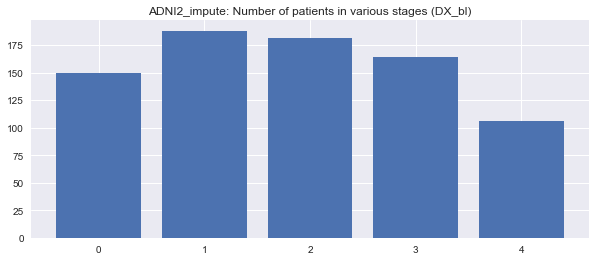

In [25]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
l = ADNI2_impute.groupby("DX_bl")["DX_bl"].count().tolist()
print(l)
ax.bar([i for i in range(len(l))], l)
ax.set_title("ADNI2_impute/ADNI2_remove: Number of patients in various stages (DX_bl)")
plt.show()

#### Covariance heatmap

Covariance matrix heatmap of a list of predictors of interest


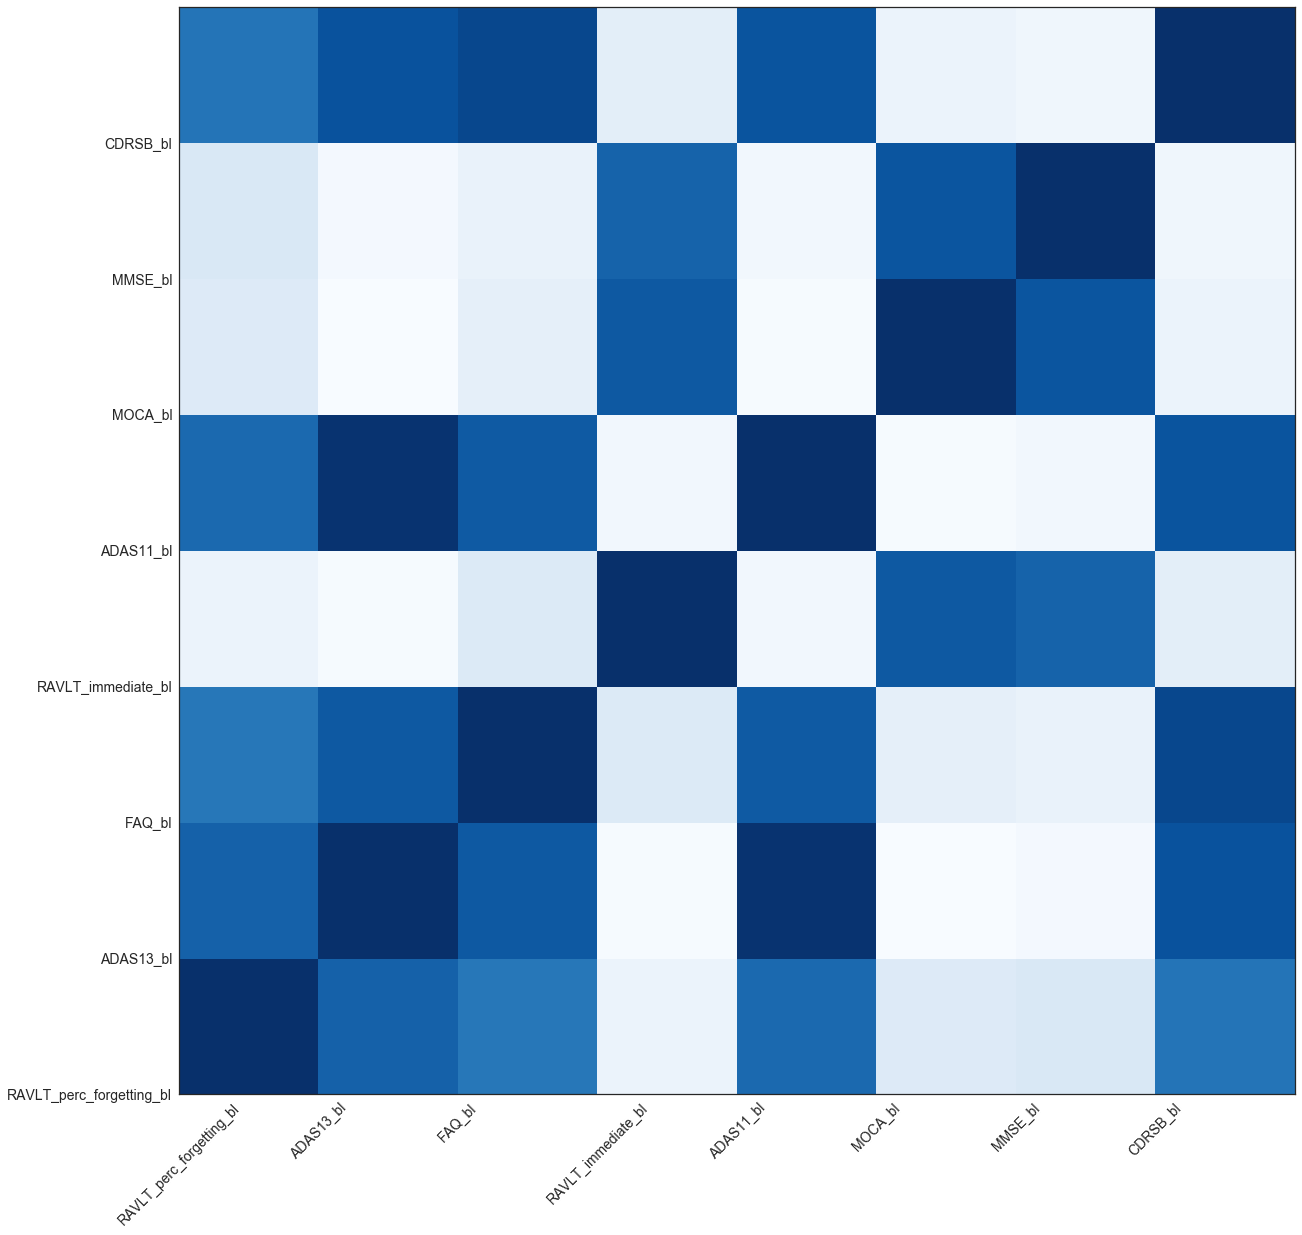

In [57]:
# L: a list of predictors of interest
L = ['RAVLT_perc_forgetting_bl',\
                             'ADAS13_bl','FAQ_bl',\
                             'RAVLT_immediate_bl',\
                             'ADAS11_bl', 'MOCA_bl', 'MMSE_bl', 'CDRSB_bl']

cm =np.corrcoef( np.transpose(ADNI2_impute[L].values.tolist()) )
print("Covariance matrix heatmap of a list of predictors of interest")

x_pos = np.arange(len(L))
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
heatmap = ax.pcolor(cm, cmap=plt.cm.Blues)#, alpha=0.8)
ax.set_xticks(x_pos)
ax.set_yticks(x_pos)
ax.set_xticklabels(L, size=14)
ax.set_yticklabels(L, size=14)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
plt.show()

#### Seaborn - Scatterplot matrix

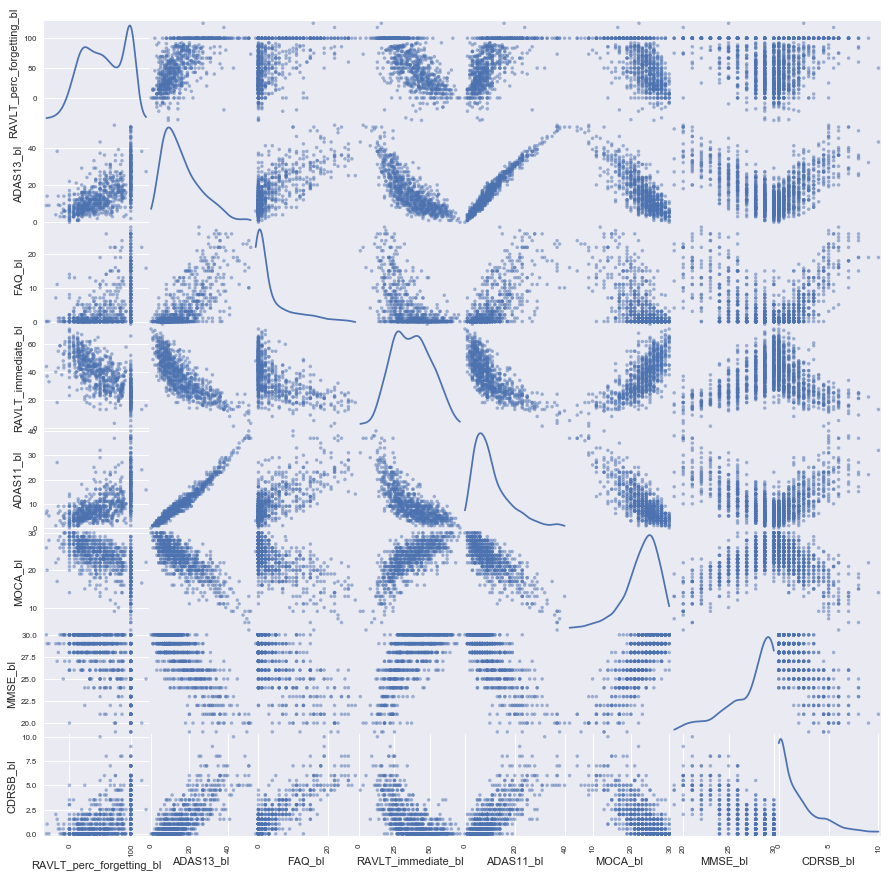

In [39]:
#sns.set(style="ticks")
#sns.pairplot(ADNI2_impute_interest, hue="DX_bl")

fig, ax = plt.subplots(1,1,figsize=(15,15))
axes = scatter_matrix(ADNI2_impute[L], alpha=0.5,\
                   diagonal='kde', ax=ax)
plt.show()

#### Seaborn - Jointplots

Jointplot between RAVLT_perc_forgetting_bl and DX_bl


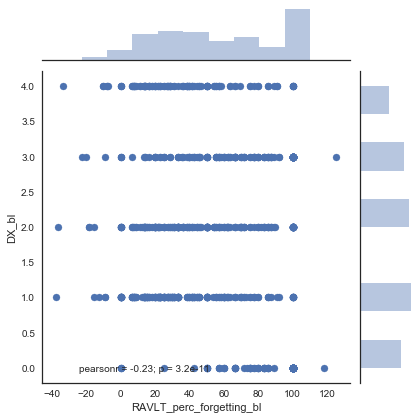

In [53]:
sns.set(style="white", color_codes=True)
#fig, ax = plt.subplots(1,1,figsize=(15,10));
ax = sns.jointplot(x=ADNI2_impute[L[0]], y=ADNI2_impute["DX_bl"]);
title = "Jointplot between " + L[0] + " and DX_bl"
print(title)
plt.show();

Jointplot between ADAS13_bl and DX_bl


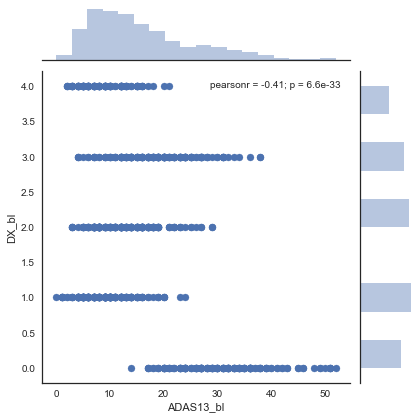

In [54]:
sns.set(style="white", color_codes=True)
#fig, ax = plt.subplots(1,1,figsize=(15,10));
ax = sns.jointplot(x=ADNI2_impute[L[1]], y=ADNI2_impute["DX_bl"]);
title = "Jointplot between " + L[1] + " and DX_bl"
print(title)
plt.show();

Jointplot between FAQ_bl and DX_bl


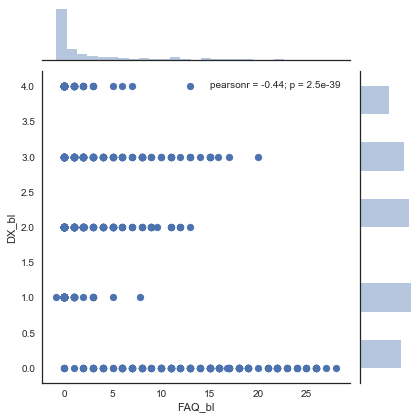

In [55]:
sns.set(style="white", color_codes=True)
#fig, ax = plt.subplots(1,1,figsize=(15,10));
ax = sns.jointplot(x=ADNI2_impute[L[2]], y=ADNI2_impute["DX_bl"]);
title = "Jointplot between " + L[2] + " and DX_bl"
print(title)
plt.show();